#                                                            Assignment 1: Covid Data

### This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

#### 
Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  See https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py (Links to an external site.)

 (Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)

## Deliverables

1) conduct EDA with visualizations and descriptive statistics
2) engineer a feature 

A short essay on findings: What are the management and analytical questions associated with this problem?



# A. Write-up for this assignment:

An Early a choice was made to scale the weekly deaths by the population of the country in the year 2019. This allows us to evaluate the data on a proportional basis (weekly deaths per person). The impact of a given country losing 10000 citizens will depend on the size of that country. Any death is saddening, but evaluating the deaths under this adjusted metric should be done nonetheless. Being present in the USA and being bombarded by media that portrays the USA as vastly underperforming in the resonse to the COVID pandemic makes this an even more important exercise. One could pose this question from a management and alysis standpoint: How do the deaths associated to the COVID pandemic in the USA compare with the deaths in other nations and the neighboring countries? When answering this question I can not overstress the importance of the individual it is not the intent to minimize the deaths of hundreds of thousands, but to provide a view of the data. Additionally, there may be other comparions that should be made, perhaps such as comparing the deaths in the USA to the developed nations. Additionally, the data is only as good as the reporting. Reported values for certain countries may not be accurate for any number of reasons. Clearly, the USA is one of the most populous countries with the largest reported mean weekly deaths. The purpose of this exercise is simply to demonstrate the impact of engineering a feature and scaling that engineered feature so that data con be evealuted from a consistent basis. Every individual truely matters, and it's a tragedy that all individuals from the vast majority of nations have had to endure. An additional question is perhaps can we ascertain what deaths will occur in the future given the cases reported this week. I will attempt to set up the data to answer this question in section D specifically for the USA, and also use scaling in the process.

A quick overlook of the data can be seen below using the .describe(), .info,  and .shape() methods on the imported data. There are a few missing entries related to the territory code, geoID, population, and notification rate. More telling are visualizations of the data. One such visualization which is contained in Appendix Figure 3 below reduces the observations to the maximum observed weekly deaths (Fig3a) and mean weekly deaths (fig3b) for the observed countries. In both of these aforementioned charts, the USA occupies the highest position on the aggregated weekly deaths metric. Figure 2 and Figure 4, also in the Appendix, seek to provide the reader with aggregation of the normalized observed deaths to the continent level. All continents have observed some tragic weeks. When the data is normalized to a per population basis, countries with less citizens become more impacted as shown in Appendix Figure 1.  The exercies in scaling data are contained in section C below. The visualizations contained in section C seek to demonstrate the magnitude of the scaled attribute relative to itself and also confirm a direct correlation with the attribute following the use of the standard and minmax scalers. It becomes apparent that the Standard scaler retains the magnitude of the variance about the mean while the minmax scaler constrains the data between 0 and 1. It is important to mention that when using the standard scaler the variance of the data thats below the mean has a floor (deaths can not be below 0) the  variance is going to be much higher on the positive side of the mean. An additional abstraction of the scaling is shown in Appendix Figure 5 for convenience which demonstrates the impact of population on the weekly deaths. When the data is scaled (demonstrated in Appendix Figure6), these independant observations collapse onto a single line. 

In section D below, data for the USA is extracted from the larger data set. It's hypothesized that due to the actions taken by specific nations, and specific demographics of a given nation, generalizations should not be taken from strictly the USA data onto the world population. The necessity for the use of scalers is important here the deaths and cases are on orders of magnitude different scales (see Appendix figure 8a and 8b). As mentioned and demonstrated previously, the MinMaxScaler and StandardScaler both linearly transform the data. The MinMaxScaler seeks to compress all of the observations between 0-1 while the StandardScaler seeks to maintain the spread in the data by maintaining the variance about the mean. Since we know that the negative variance is held in check by a floor (0 deaths and 0 cases) it's likely that the MinMaxScaler will be advantaged. Plotted in Appendix figure 9. is the scaled weekly deaths and cases using both scalers  with respect to time for the USA data. In the earlier days when deaths started to rise they were disproporitonate to the observed cases. Perhaps this may have been due to lack of adequate testing, however, in the later stages of the pandemic these two features synchronize nicely, but perhaps the deaths are a bit lagging relative to the the cases.

There are two plotly charts below that will not render if viewing directly on github. 



# B. Libraries and Data Preparation

### Import necessary libraries and data; Add datetype conversion and ElapsedDays as numeric column.

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
import datetime
import plotly.express as px


CovidData = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/CovidData.csv")

CovidData['dateRep'] = pd.to_datetime(CovidData['dateRep'].astype(str), format= '%d/%m/%Y')


minDate = CovidData['dateRep'].min()

CovidData['ElapsedDays'] = CovidData['dateRep'].sub(minDate)
CovidData['ElapsedDays'] = CovidData['ElapsedDays']/ np.timedelta64(1, 'D')
CovidData['Deaths_per_Pop'] = CovidData['deaths_weekly']/CovidData['popData2019']

In [2]:
trimmed_date= datetime.datetime(2021, 1, 30)

Data_trimed = CovidData[CovidData['dateRep'] < trimmed_date ]
Data_excess = CovidData[CovidData['dateRep'] < trimmed_date ]

In [3]:
display(Data_trimed.head())
display(Data_trimed.info())

display(Data_trimed.groupby('countriesAndTerritories').describe())


#this is all time series data.


,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days,ElapsedDays,Deaths_per_Pop
0,2020-06-01,2020-22,4623,39,Afghanistan,AF,AFG,38041757.0,Asia,22.45,147.0,1.025189e-06
1,2020-06-01,2020-22,139,1,Albania,AL,ALB,2862427.0,Europe,6.67,147.0,3.493539e-07
2,2020-06-01,2020-22,1088,53,Algeria,DZ,DZA,43053054.0,Africa,5.52,147.0,1.231039e-06
3,2020-06-01,2020-22,1,0,Andorra,AD,AND,76177.0,Europe,3.94,147.0,0.000000e+00
4,2020-06-01,2020-22,17,0,Angola,AO,AGO,31825299.0,Africa,0.12,147.0,0.000000e+00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9791 entries, 0 to 9790
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   dateRep                                          9791 non-null   datetime64[ns]
 1   year_week                                        9791 non-null   object        
 2   cases_weekly                                     9791 non-null   int64         
 3   deaths_weekly                                    9791 non-null   int64         
 4   countriesAndTerritories                          9791 non-null   object        
 5   geoId                                            9747 non-null   object        
 6   countryterritoryCode                             9769 non-null   object        
 7   popData2019                                      9769 non-null   float64       
 8   continentExp                          

None

cases_weekly                                         \
                               count         mean          std  min     25%   
countriesAndTerritories                                                       
Afghanistan                     54.0   992.296296  1283.826219  0.0  126.25   
Albania                         45.0  1413.222222  1663.387383  2.0  139.00   
Algeria                         54.0  1891.555556  1861.062759  0.0  624.25   
Andorra                         44.0   197.318182   229.949112  0.0    9.50   
Angola                          43.0   423.093023   469.509258  2.0   19.00   
...                              ...          ...          ...  ...     ...   
Wallis_and_Futuna               13.0     0.307692     0.480384  0.0    0.00   
Western_Sahara                  38.0    20.157895    68.990217  0.0    0.00   
Yemen                           40.0    52.700000    68.451068  0.0    4.00   
Zambia                          43.0   665.023256  1084.710242  3.0  132.00   
Zimbabwe                        43.0   499.465116   994.389939  2.0   75.50   

                                                 deaths_weekly             \
                            50%      75%     max         count       mean   
countriesAndTerritories                                                     
Afghanistan               496.5  1319.25  5137.0          54.0  42.611111   
Albania                   874.0  2045.00  5542.0          45.0  27.577778   
Algeria                  1291.5  3045.00  7359.0          54.0  51.981481   
Andorra                    89.5   300.50   787.0          44.0   1.954545   
Angola                    307.0   652.00  1779.0          43.0   9.674419   
...                         ...      ...     ...           ...        ...   
Wallis_and_Futuna           0.0     1.00     1.0          13.0   0.000000   
Western_Sahara              0.0     0.00   311.0          38.0   0.026316   
Yemen                      14.0    75.50   242.0          40.0  15.300000   
Zambia                    358.0   757.00  6603.0          43.0  10.953488   
Zimbabwe                  149.0   619.00  6212.0          43.0  11.790698   

                         ... ElapsedDays        Deaths_per_Pop                \
                         ...         75%    max          count          mean   
countriesAndTerritories  ...                                                   
Afghanistan              ...      278.25  371.0           54.0  1.120114e-06   
Albania                  ...      294.00  371.0           45.0  9.634404e-06   
Algeria                  ...      278.25  371.0           54.0  1.207382e-06   
Andorra                  ...      295.75  371.0           44.0  2.565795e-05   
Angola                   ...      297.50  371.0           43.0  3.039852e-07   
...                      ...         ...    ...            ...           ...   
Wallis_and_Futuna        ...      350.00  371.0            0.0           NaN   
Western_Sahara           ...      306.25  371.0           38.0  4.518058e-08   
Yemen                    ...      302.75  371.0           40.0  5.246568e-07   
Zambia                   ...      297.50  371.0           43.0  6.132617e-07   
Zimbabwe                 ...      297.50  371.0           43.0  8.050746e-07   

                                                                        \
                                  std  min           25%           50%   
countriesAndTerritories                                                  
Afghanistan              1.244096e-06  0.0  1.314345e-07  6.045988e-07   
Albania                  1.019662e-05  0.0  1.048062e-06  7.336432e-06   
Algeria                  8.441557e-07  0.0  8.129505e-07  1.277494e-06   
Andorra                  4.092445e-05  0.0  0.000000e+00  0.000000e+00   
Angola                   2.592648e-07  0.0  6.284309e-08  2.827939e-07   
...                               ...  ...           ...           ...   
Wallis_and_Futuna                 NaN  NaN         

## There are way too many countries here intiially let's work with a subset to explore; let's pick the Americas. And let's target weekly deaths.
    1) It looks like the data for  weekly deaths swings quite a bit
    

Count of days where deaths exceed 5/100,000 people for countries in the americas


,countriesAndTerritories,Number of Days
0,Argentina,7
1,Belize,7
2,Bermuda,1
3,Bolivia,1
4,Chile,5
5,Ecuador,2
6,Mexico,1
7,Montserrat,1
8,Panama,4
9,Peru,2


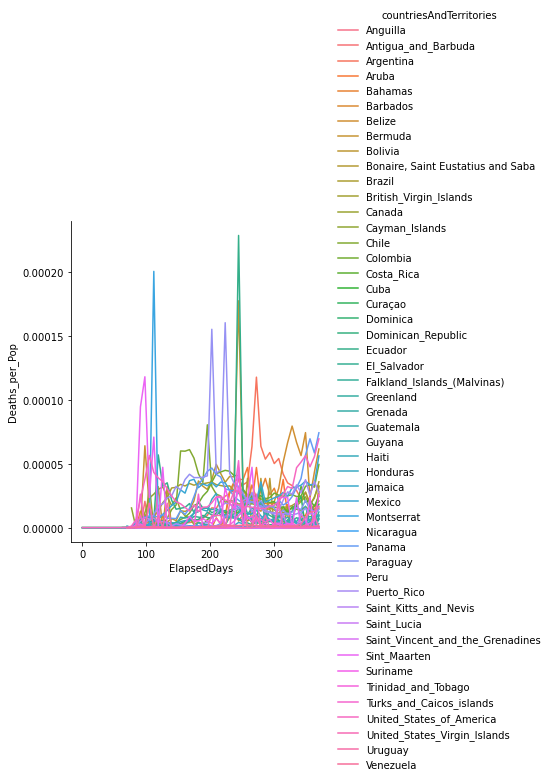

In [4]:
#subset our data
Americas = Data_trimed[Data_trimed['continentExp'] =='America'].copy()

#reset our index and drop due to less rows. 
Americas.reset_index(inplace=True, drop = True)

#plot
sns.relplot(data=Americas, x="ElapsedDays", y="Deaths_per_Pop",hue="countriesAndTerritories", kind='line')

#summary count of days where deaths exceed 5/100,000 people for countries in the americas
high_rate_days = Americas[Americas["Deaths_per_Pop"] > 0.00005 ]
counts = high_rate_days.groupby('countriesAndTerritories').size().reset_index(name='Number of Days')

print('Count of days where deaths exceed 5/100,000 people for countries in the americas')
counts   

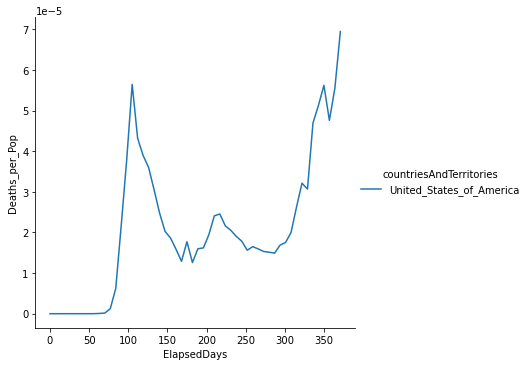

In [5]:
#subset USA data
USA = Americas[Americas['countriesAndTerritories'] == 'United_States_of_America']

#since we have shrunken our dataframe we need to reset the index and drop the old one
USA.reset_index(inplace=True, drop=True )

#plot
sns.relplot(data=USA,x="ElapsedDays", y="Deaths_per_Pop",hue="countriesAndTerritories", kind='line')


### Subsetting the Columns to scale.

In [6]:
#These are the columns to scale; Days we didn't use.
y_Americas = Americas[['ElapsedDays', 'Deaths_per_Pop']]
y_All = Data_trimed[['ElapsedDays', 'Deaths_per_Pop']]
y_USA = USA[['ElapsedDays', 'Deaths_per_Pop']]

# C. Exercise in Scaling Data

## Let's scale our weekly deaths using two scalers (minmax and StandardScaler); both datasets.

In [7]:
#our two scalers

#MinMax scale
MinMax_USA = MinMaxScaler().fit_transform(y_USA)
MinMax_Americas = MinMaxScaler().fit_transform(y_Americas)
MinMax_All = MinMaxScaler().fit_transform(y_All)

#Standard scale
Standard_USA = StandardScaler().fit_transform(y_USA)
Standard_Americas = StandardScaler().fit_transform(y_Americas)
Standard_All = StandardScaler().fit_transform(y_All)



## Scaling of USA data

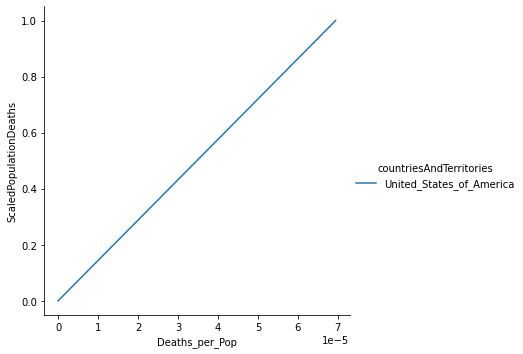

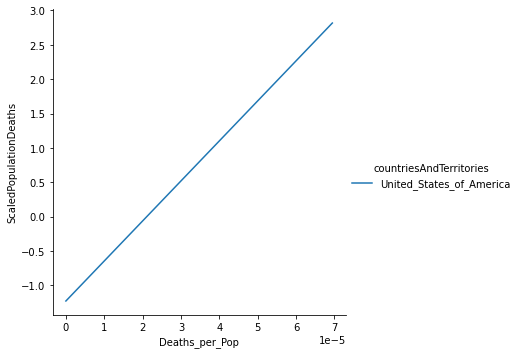

In [8]:
#construct new DF for each scaled data; prepare to merge with original
MinMax_USA_df = pd.DataFrame(MinMax_USA, columns = ['time_days', 'ScaledPopulationDeaths'])
Standard_USA_df = pd.DataFrame(Standard_USA, columns = ['time_days', 'ScaledPopulationDeaths'])

#recombine with original DF to access country name
MinMax_USA_merge = MinMax_USA_df.merge(USA, how='left', left_index = True, right_index=True)
Standard_USA_merge = Standard_USA_df.merge(USA, how='left', left_index = True, right_index=True)


#plots
display(sns.relplot(data= MinMax_USA_merge, x='Deaths_per_Pop', y='ScaledPopulationDeaths', hue="countriesAndTerritories", kind='line'))
display(sns.relplot(data= Standard_USA_merge, x='Deaths_per_Pop', y='ScaledPopulationDeaths', hue="countriesAndTerritories", kind='line'))

## Scaling of Americas Data

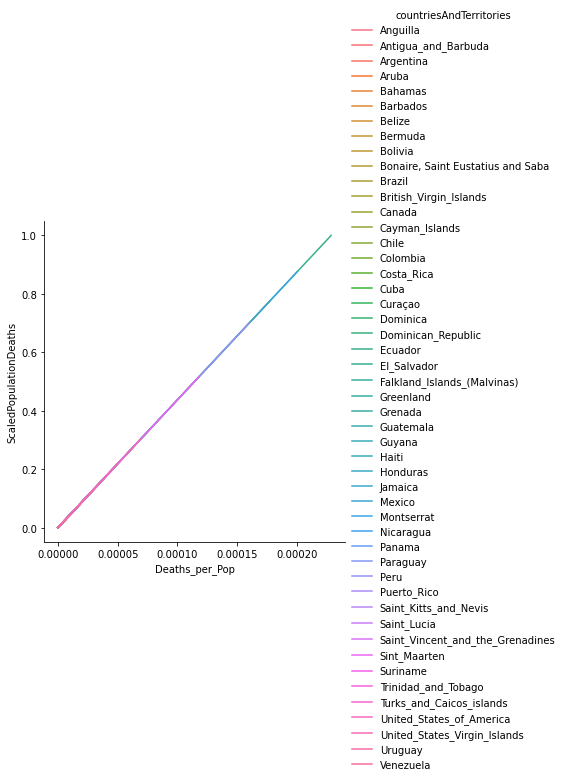

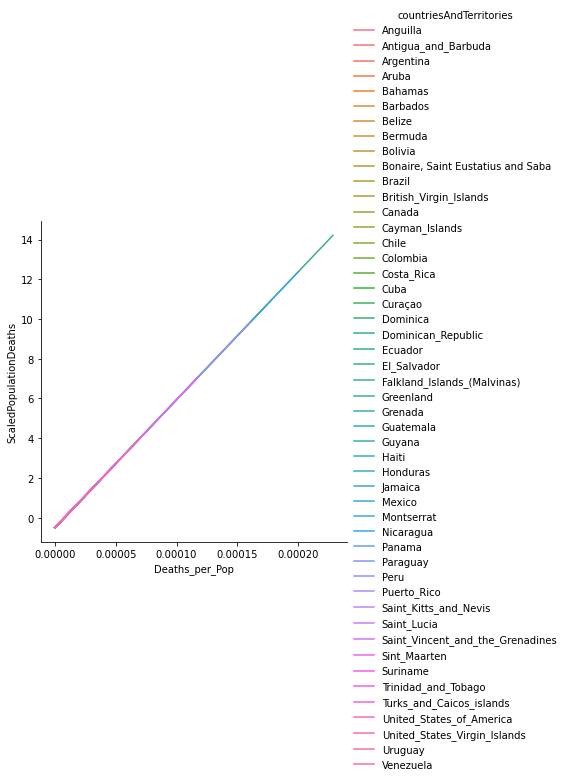

In [9]:
#construct new DF for each scaled data; prepare to merge with original
MinMax_Americas_df = pd.DataFrame(MinMax_Americas, columns = ['time_days', 'ScaledPopulationDeaths'])
Standard_Americas_df = pd.DataFrame(Standard_Americas, columns = ['time_days', 'ScaledPopulationDeaths'])

#recombine with original DFs to access country name
MinMax_Americas_merge = MinMax_Americas_df.merge(Americas, how='left', left_index = True, right_index=True)
Standard_Americas_merge =Standard_Americas_df.merge(Americas, how='left', left_index = True, right_index=True)


sns.relplot(data= MinMax_Americas_merge, x='Deaths_per_Pop', y='ScaledPopulationDeaths', hue="countriesAndTerritories", kind='line')
sns.relplot(data= Standard_Americas_merge, x='Deaths_per_Pop', y='ScaledPopulationDeaths', hue="countriesAndTerritories", kind='line')


## Now Let's scale the world.


In [10]:
#construct new DF for each scaled data; prepare to merge with original
MinMax_All_df = pd.DataFrame(MinMax_All, columns = ['time_days', 'ScaledPopulationDeaths'])
Standard_All_df = pd.DataFrame(Standard_All, columns = ['time_days', 'ScaledPopulationDeaths'])

#recombine with original DFs to access country name
MinMax_All_merge = MinMax_All_df.merge(Data_trimed, how='left', left_index = True, right_index=True)
Standard_All_merge = Standard_All_df.merge(Data_trimed, how='left', left_index = True, right_index=True)



### hidden plots, too many countries
#sns.relplot(data= MinMax_All_merge, x='Deaths_per_Pop', y='PopulationDeaths', hue="countriesAndTerritories", kind='line')
#sns.relplot(data= Standard_All_merge, x='Deaths_per_Pop', y='PopulationDeaths', hue="countriesAndTerritories", kind='line')

## Comparison of the non normalized data versus the scaled and normalized (per population) data for the Americas continent. As well as only the USA normalized data

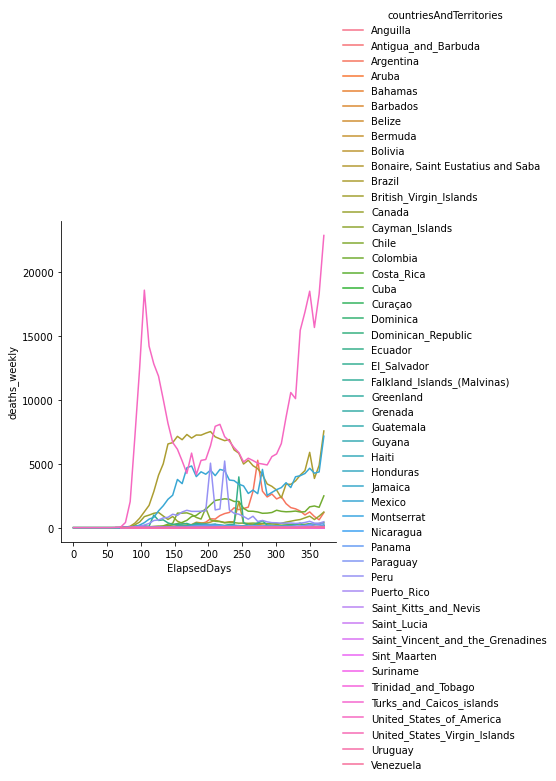

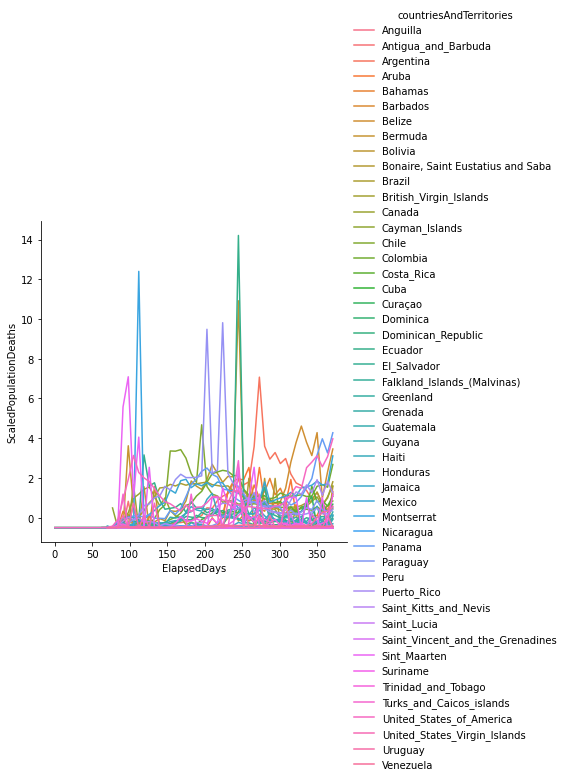

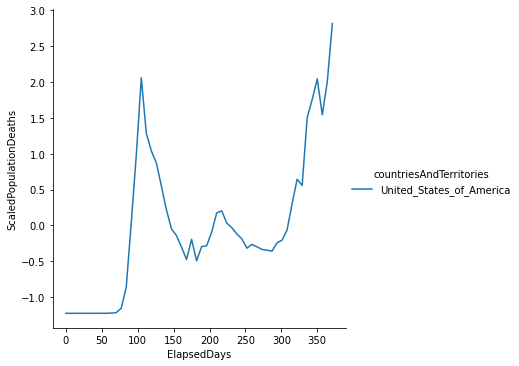

In [11]:
sns.relplot(
    data=Standard_Americas_merge,
    x="ElapsedDays", y="deaths_weekly",
    hue="countriesAndTerritories", kind='line')

sns.relplot(
    data=Standard_Americas_merge,
    x="ElapsedDays", y='ScaledPopulationDeaths',
    hue="countriesAndTerritories", kind='line')

sns.relplot(
    data=Standard_USA_merge,
    x="ElapsedDays", y='ScaledPopulationDeaths',
    hue="countriesAndTerritories", kind='line')

# D: Management Question; How do cases relate to deaths in the USA


In [12]:
df = Data_trimed[['countriesAndTerritories', 'ElapsedDays', 'cases_weekly', 'deaths_weekly']]
#df.ElapsedDays = df.ElapsedDays.astype(str)
USA_wide = df[df['countriesAndTerritories'] == 'United_States_of_America']
#df.set_index(["countriesAndTerritories", "ElapsedDays" ])

long_df = df.melt(id_vars= ['countriesAndTerritories', 'ElapsedDays'], value_vars = ['cases_weekly', 'deaths_weekly'], var_name ='Attribute')

long_USA = long_df[long_df['countriesAndTerritories'] == 'United_States_of_America']

In [13]:
USA_wide.reset_index(inplace=True, drop=True)
y_USA_w= USA_wide[['cases_weekly', 'deaths_weekly']]

MinMax_USA_w = MinMaxScaler().fit_transform(y_USA_w)
Standard_USA_w = StandardScaler().fit_transform(y_USA_w)

MinMax_USA_w_df = pd.DataFrame(MinMax_USA_w, columns = ['WeeklyCases_MinMax', 'WeeklyDeaths_MinMax'])
Standard_USA_w_df = pd.DataFrame(Standard_USA_w, columns = ['WeeklyCases_Standard', 'WeeklyDeaths_Standard'])

MinMax_USA_w_merge = MinMax_USA_w_df.merge(USA_wide, how='left', left_index = True, right_index=True)
Scale_USA_w = MinMax_USA_w_merge.merge(Standard_USA_w_df,  how='left', left_index = True, right_index=True)

mm_usa_trunc= Scale_USA_w[['ElapsedDays', 'countriesAndTerritories', 'WeeklyCases_MinMax', 'WeeklyDeaths_MinMax', 'WeeklyCases_Standard', 'WeeklyDeaths_Standard']]


mm_usa_trunc_l = mm_usa_trunc.melt(id_vars= ['countriesAndTerritories', 'ElapsedDays'], value_vars = ['WeeklyCases_MinMax', 'WeeklyDeaths_MinMax', 'WeeklyCases_Standard', 'WeeklyDeaths_Standard'], var_name ='Attribute')


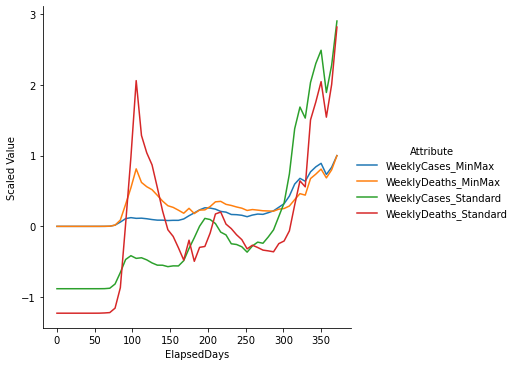

In [14]:
scaled_plot = sns.relplot(data=mm_usa_trunc_l, x="ElapsedDays", y='value', hue='Attribute', kind='line')
scaled_plot.set_axis_labels("ElapsedDays", "Scaled Value")

# E:  Appendix


## Figure 1: Countries which appear more impacted when adjusting for population and scaling the data.

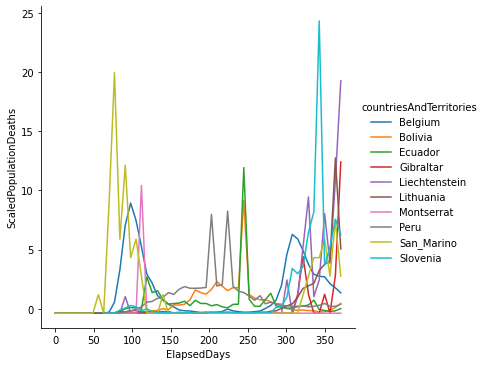

In [15]:
impacted = Standard_All_merge[Standard_All_merge['ScaledPopulationDeaths']> 8.2]

high_impact_countries = impacted.countriesAndTerritories.unique() 

high_impact_df =Standard_All_merge.query("countriesAndTerritories in @high_impact_countries")

sns.relplot(
    data=high_impact_df,
    x="ElapsedDays", y='ScaledPopulationDeaths',
    hue="countriesAndTerritories", kind='line')
#Standard_Americas_merge[Standard_Americas_merge['countriesAndTerritories'].isin(high_impact_countries)

## Figure 2: Mean deaths (by continent)

<AxesSubplot:xlabel='continentExp'>

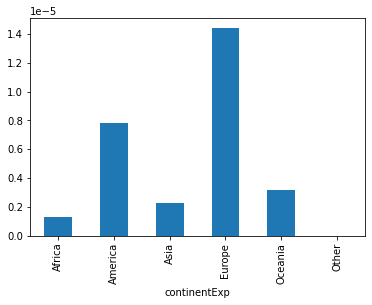

In [16]:
means = Data_trimed.groupby([ 'continentExp'])['Deaths_per_Pop'].mean()
means.plot.bar()

In [17]:
max_deaths = Data_trimed.groupby(['countriesAndTerritories'])['deaths_weekly',"popData2019"].max()


max_deaths['countriesAndTerritories'] = max_deaths.index
max_deaths['countriesAndTerritories'] = max_deaths['countriesAndTerritories'].astype(str)
max_deaths = max_deaths.reset_index(drop=True)


max_fig = px.scatter(max_deaths, x="popData2019", y="deaths_weekly", color="countriesAndTerritories", title="Max Weekly Deaths vs 2019 Population (all countries)")

In [18]:
mean_deaths = Data_trimed.groupby(['countriesAndTerritories'])['deaths_weekly',"popData2019"].mean()


mean_deaths['countriesAndTerritories'] = mean_deaths.index
mean_deaths['countriesAndTerritories'] = mean_deaths['countriesAndTerritories'].astype(str)
mean_deaths = mean_deaths.reset_index(drop=True)


mean_fig = px.scatter(mean_deaths, x="popData2019", y="deaths_weekly", color="countriesAndTerritories", title="Mean Weekly Deaths vs 2019 Population (all countries)")

## Figure 3: Maxiumum observed weekly deaths vs population
    Countries that have worse outcomes in max weekly deaths on a popultion basis have steeper slopes from the origin. 


In [19]:
max_fig



In [20]:
mean_fig

#max_fig.write_html("C:/Users/bblank/Documents/Northwestern MSDS/exports/max.html")
#mean_fig.write_html("C:/Users/bblank/Documents/Northwestern MSDS/exports/mean.html")

## Figure 4: The Distribution of deaths per person by continent

<AxesSubplot:xlabel='continentExp', ylabel='Deaths_per_Pop'>

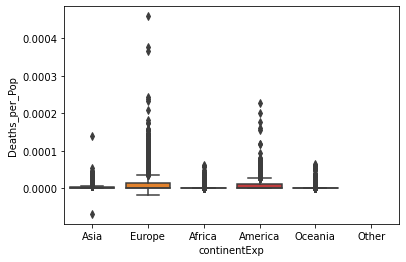

In [21]:

sns.boxplot(x="continentExp", y="Deaths_per_Pop", data=Data_trimed)

## Figure 5: Demonstrating the impact of scaling the data. First A New Feature deaths/person in the population
    less populated countries with moderate fatalities now appear further to the right

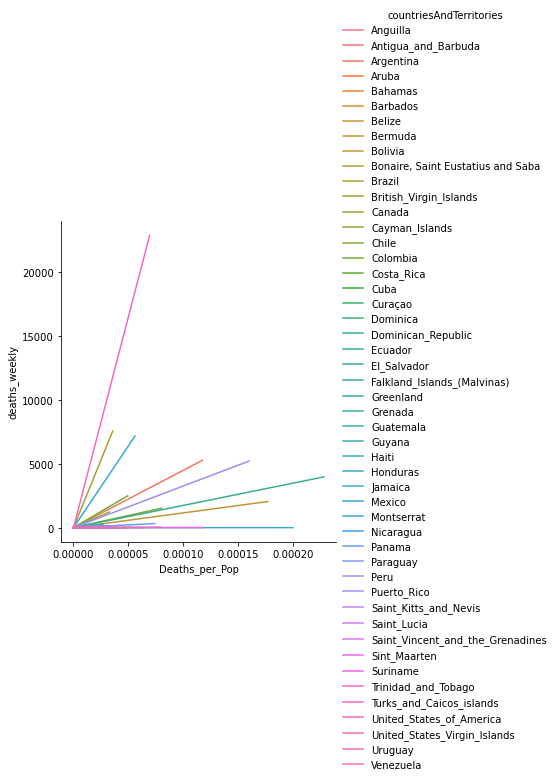

In [22]:
sns.relplot(data= MinMax_Americas_merge, x='Deaths_per_Pop', y='deaths_weekly', hue="countriesAndTerritories", kind='line')


## Figre 6: Completing the demonstration of scaling. The scaled population as a function of the normalized population deaths. 

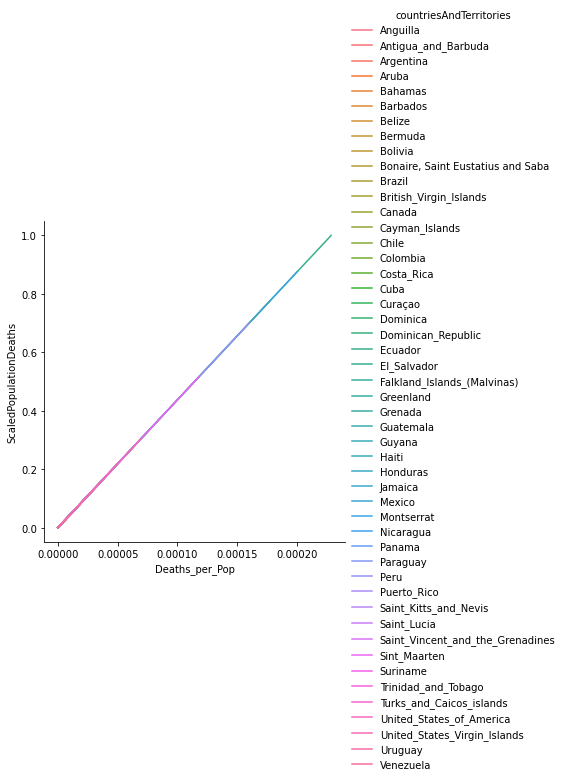

In [23]:
sns.relplot(data= MinMax_Americas_merge, x='Deaths_per_Pop', y='ScaledPopulationDeaths', hue="countriesAndTerritories", kind='line')

## Figure 7: An overlook of data for the Americas continent


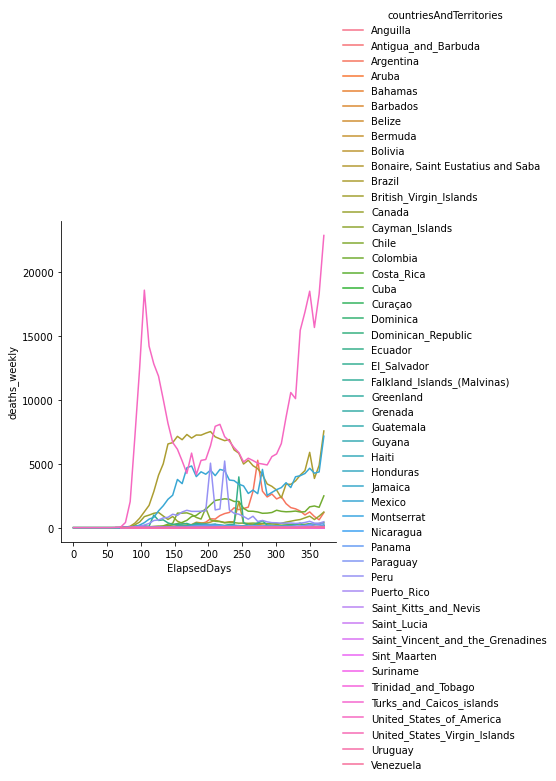

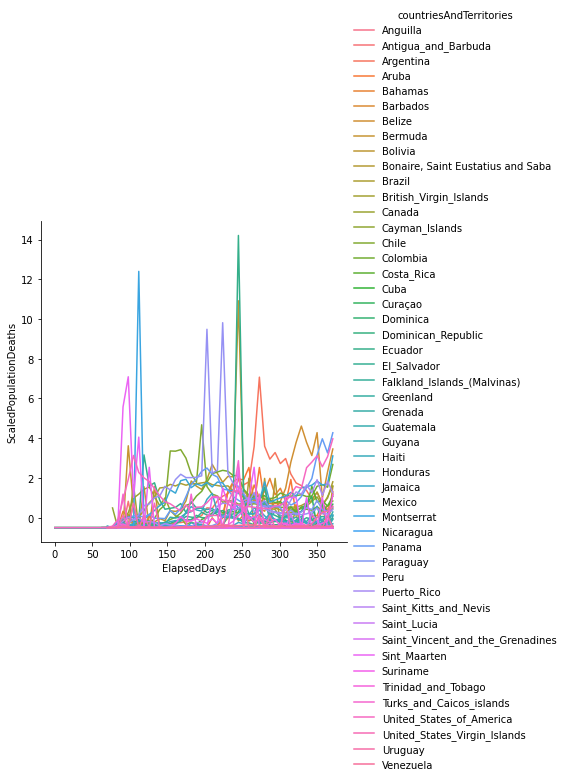

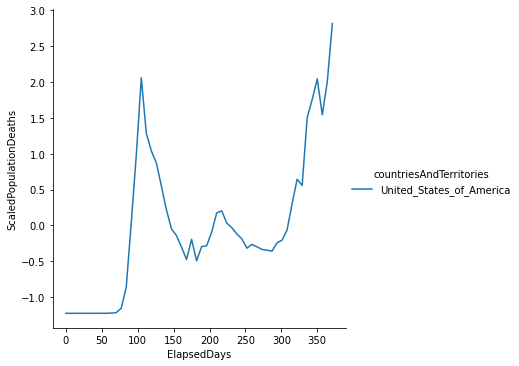

In [24]:
sns.relplot(data=Standard_Americas_merge, x="ElapsedDays", y="deaths_weekly", hue="countriesAndTerritories", kind='line')

sns.relplot(data=Standard_Americas_merge, x="ElapsedDays", y='ScaledPopulationDeaths', hue="countriesAndTerritories", kind='line')

sns.relplot(data=Standard_USA_merge, x="ElapsedDays", y='ScaledPopulationDeaths', hue="countriesAndTerritories", kind='line')

## Figure 8: a) Weekly deaths and b) Weekly cases in the USA; 

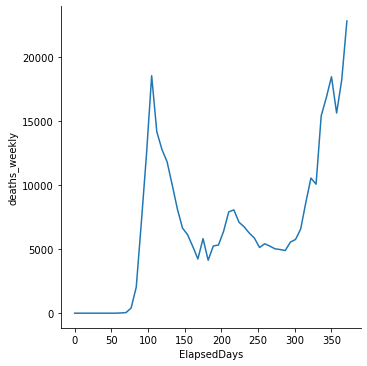

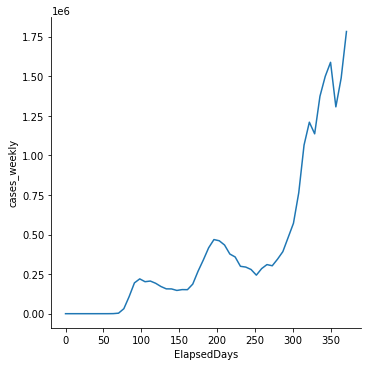

In [25]:
sns.relplot(data=USA_wide, x="ElapsedDays", y='deaths_weekly', kind='line')
sns.relplot(data=USA_wide, x="ElapsedDays", y='cases_weekly', kind='line')

## Figure 9: Scaled data for weekly deaths and and cases with respect to time in the USA

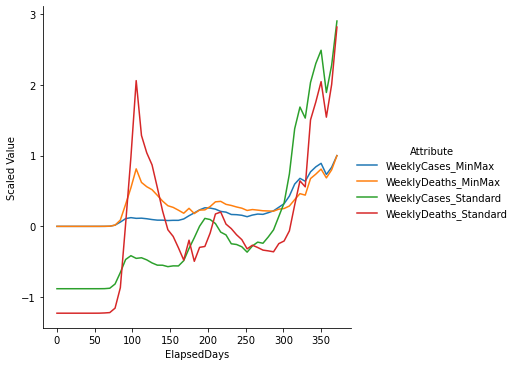

In [26]:
scaled_plot = sns.relplot(data=mm_usa_trunc_l, x="ElapsedDays", y='value', hue='Attribute', kind='line')
scaled_plot.set_axis_labels("ElapsedDays", "Scaled Value")

<AxesSubplot:>

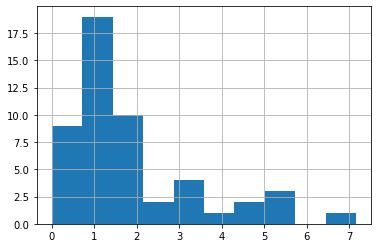

In [30]:
MinMax_cases = mm_usa_trunc['WeeklyCases_MinMax']
MinMax_deaths = mm_usa_trunc['WeeklyDeaths_MinMax']

ratio = MinMax_deaths/MinMax_cases

ratio.hist()


